# Basic Test

In [1]:

from imports import *
from agents import *
from environment import *
from simulations import *
from utils import *
from stationarity_analysis import *

# Environment Testing

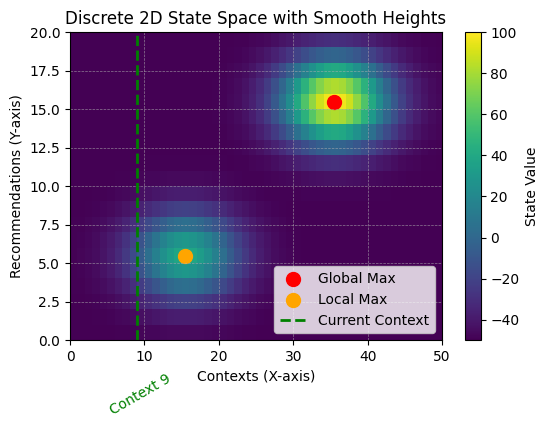

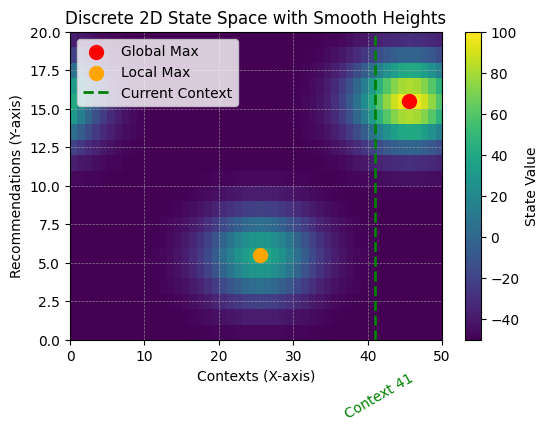

[9, np.int64(4), np.int64(2), np.int64(0), np.int64(46), np.int64(48), np.int64(49), np.int64(0), np.int64(45), np.int64(43), np.int64(41)]


In [2]:
ere = ExogenousRewardEnvironment()
ere.do_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

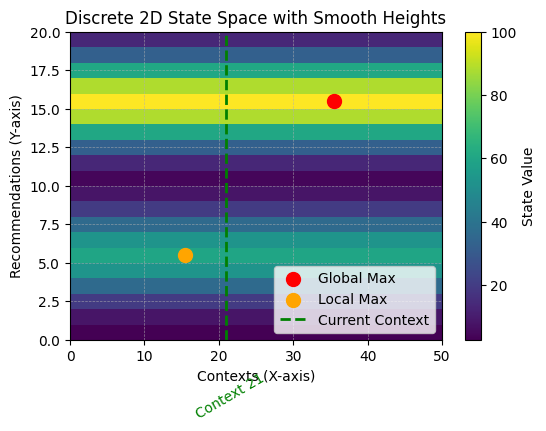

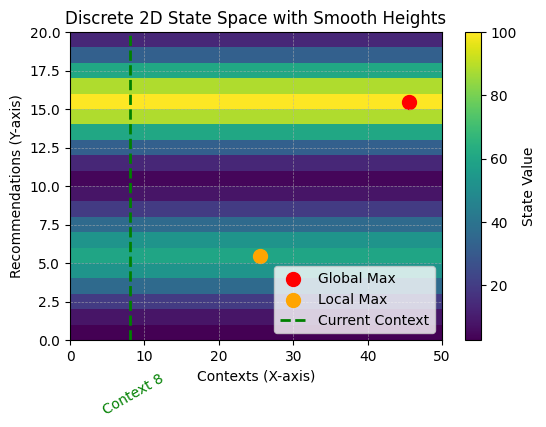

[21, np.int64(16), np.int64(12), np.int64(14), np.int64(10), np.int64(12), np.int64(14), np.int64(10), np.int64(6), np.int64(10), np.int64(8)]


In [3]:
ere = ExogenousRewardEnvironment()
ere.do_rows_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

# Simulation Testing

## Stationary, Initiation, No Modulation

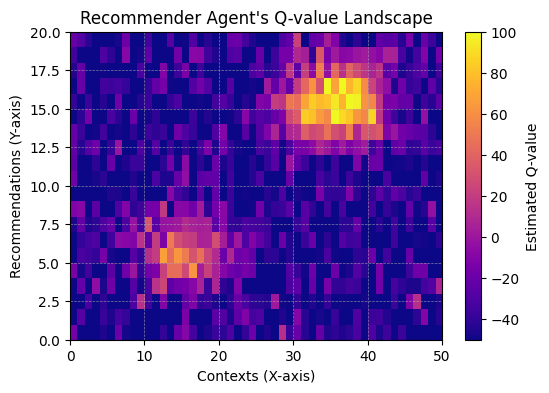

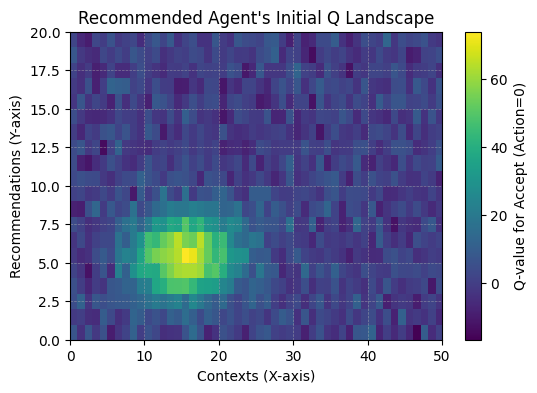

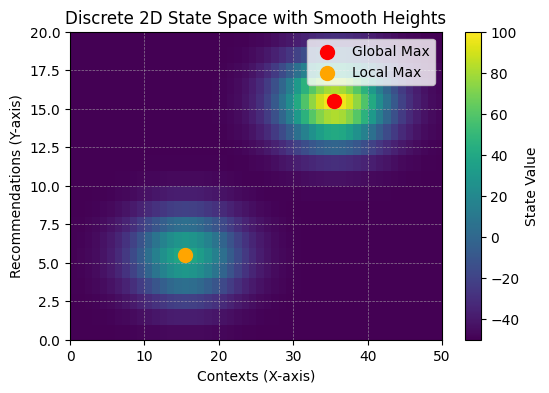

Running Simulation: 100%|██████████| 1000000/1000000 [02:09<00:00, 7733.46it/s]


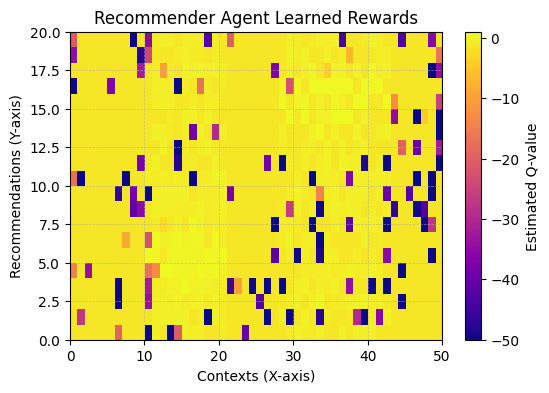

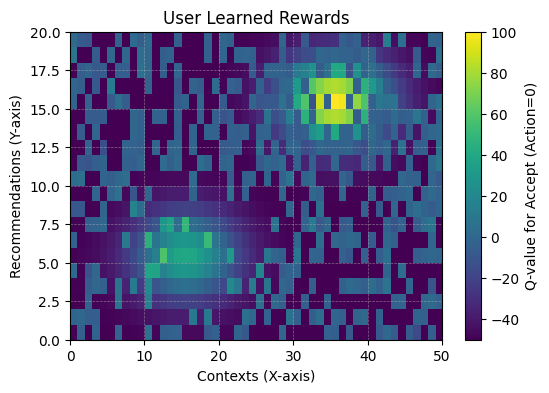

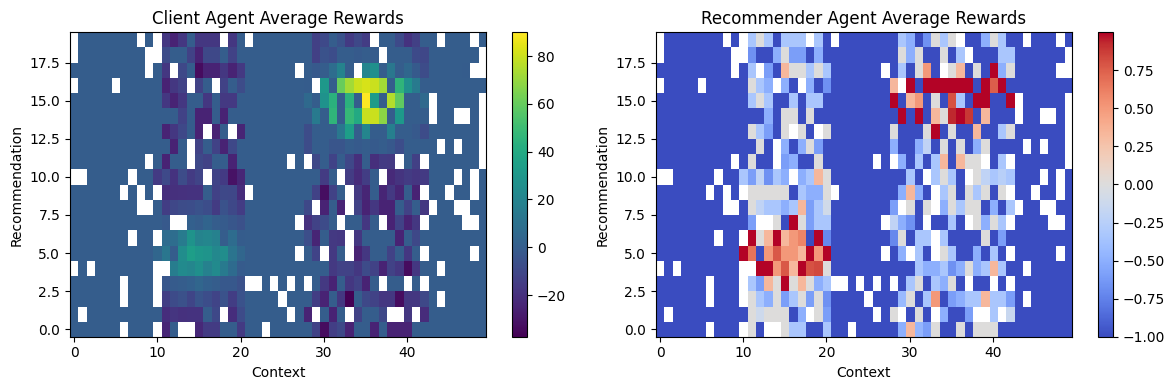

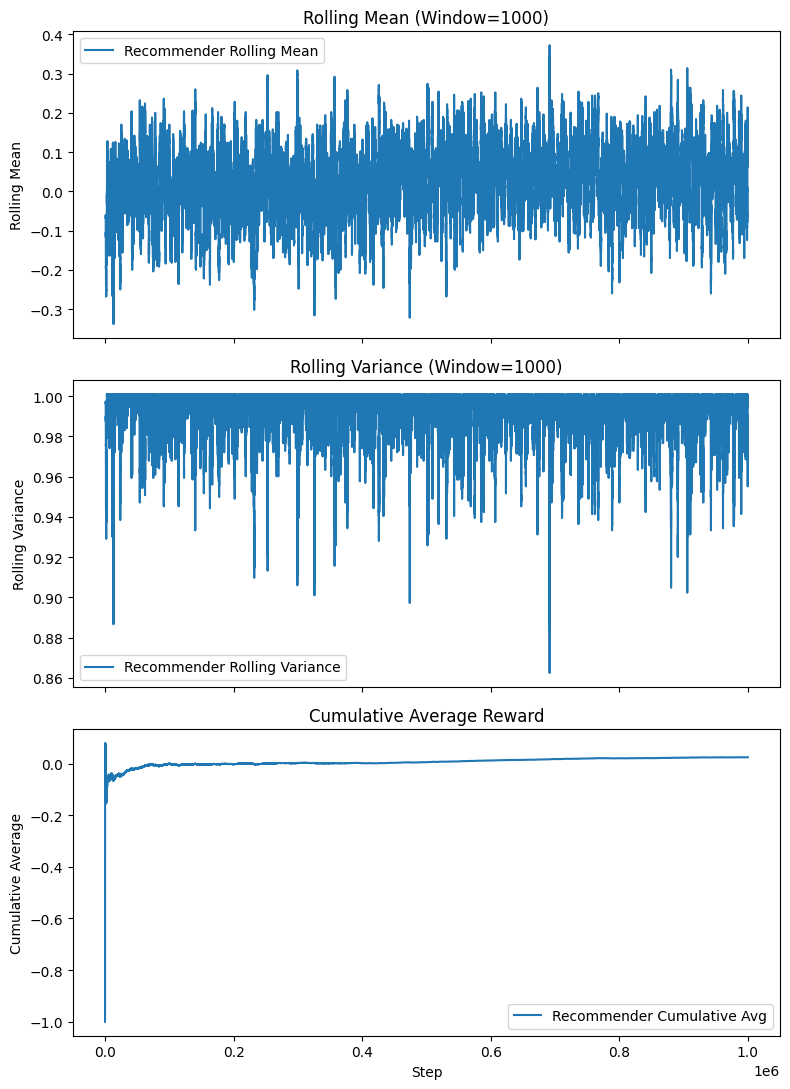

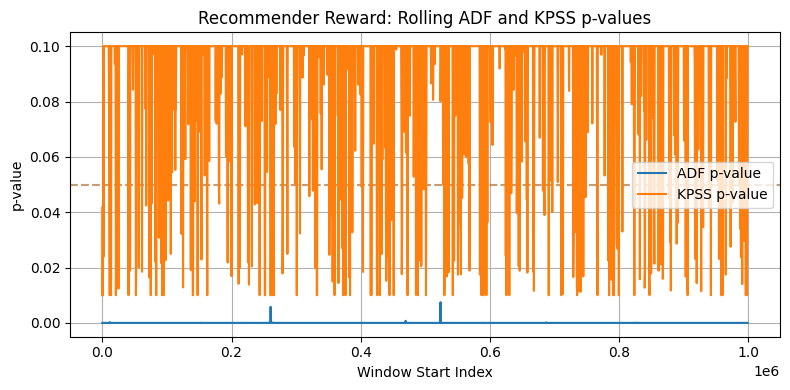

    context    adf_pvalue  kpss_pvalue
0         0  0.000000e+00     0.097939
1         1  0.000000e+00     0.011682
2         2  0.000000e+00     0.079203
3         3  0.000000e+00     0.078199
4         4  2.240160e-30     0.051801
5         5  0.000000e+00     0.100000
6         6  0.000000e+00     0.039337
7         7  0.000000e+00     0.079682
8         8  0.000000e+00     0.049845
9         9  0.000000e+00     0.017805
10       10  6.835286e-01     0.010000
11       11  0.000000e+00     0.045353
12       12  0.000000e+00     0.069110
13       13  0.000000e+00     0.090635
14       14  0.000000e+00     0.071247
15       15  0.000000e+00     0.029144
16       16  6.295934e-27     0.022756
17       17  0.000000e+00     0.090222
18       18  0.000000e+00     0.013946
19       19  2.691223e-24     0.036060
20       20  0.000000e+00     0.057899
21       21  0.000000e+00     0.048467
22       22  0.000000e+00     0.017687
23       23  0.000000e+00     0.100000
24       24  0.000000e+00

In [4]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='egreedy', modulated = False)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# Plot the p-values
plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

stationarity_df = test_stationarity_by_context(
    contexts=results["context_history"],
    rewards=results["recommender_rewards"])
print(stationarity_df)

## Non-Stationary, Initiation, No Modulation



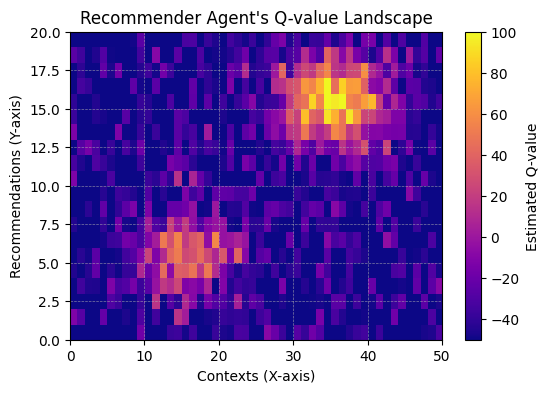

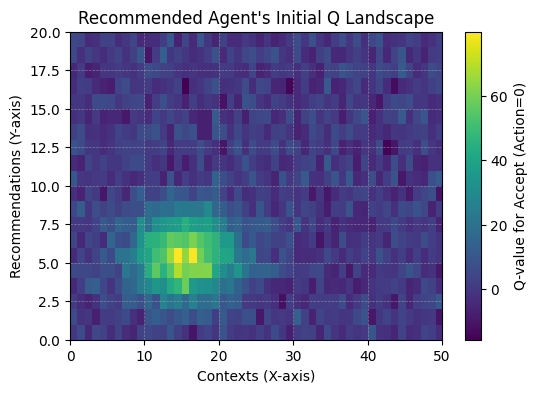

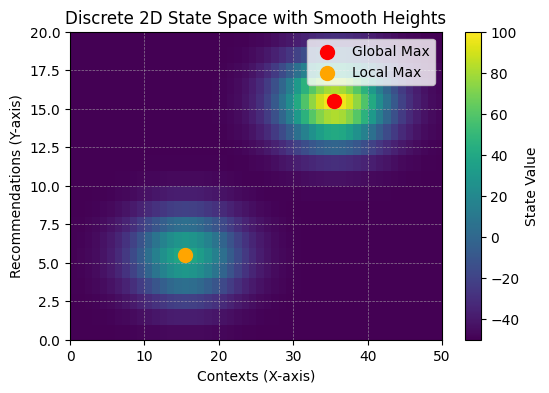

Running Simulation: 100%|██████████| 1000000/1000000 [03:00<00:00, 5529.20it/s]


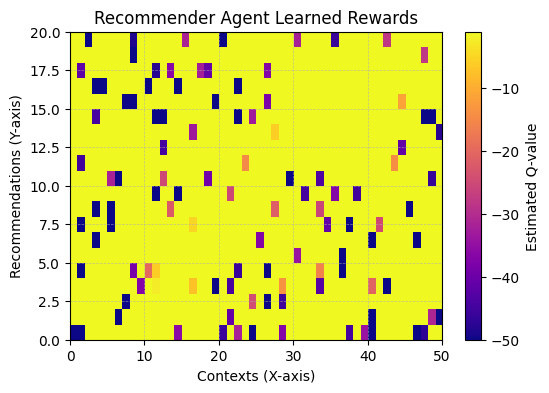

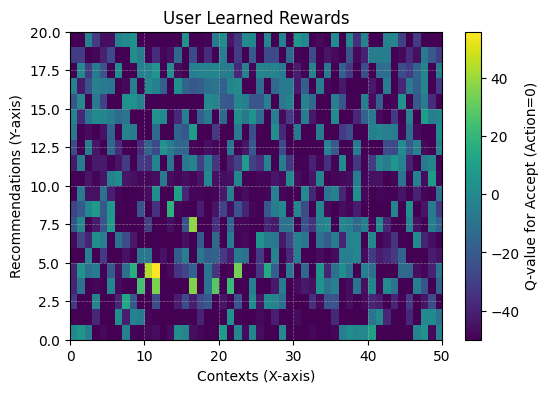

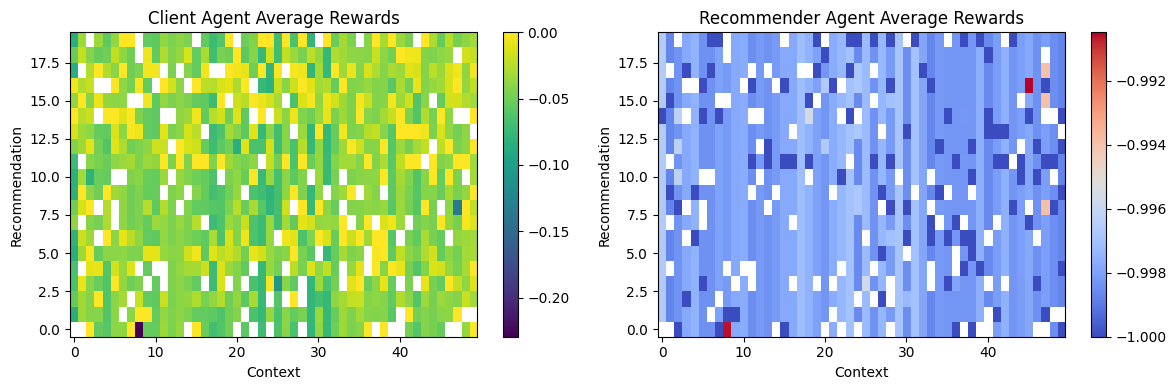

/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2182: RuntimeWarning: invalid value encountered in scalar divide
  s_hat = s1 / s0
/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2182: RuntimeWarning: invalid value encountered in scalar divide
  s_hat = s1 / s0
/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2182: RuntimeWarning: invalid value encountered in scalar divide
  s_hat = s1 / s0
/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2182: RuntimeWarning: invalid value encountered in scalar divide
  s_hat = s1 / s0
/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/s

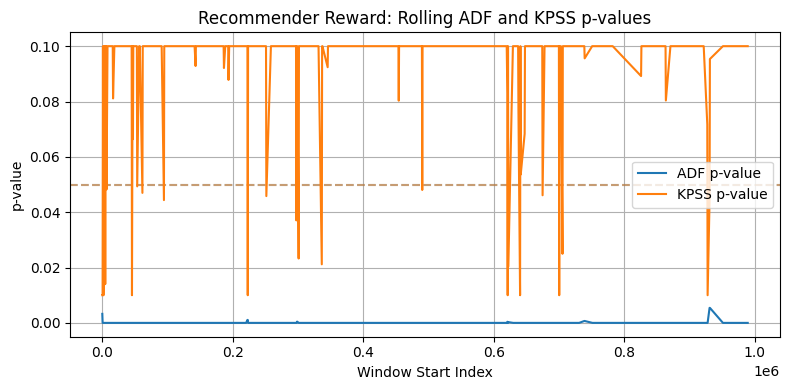

    context    adf_pvalue  kpss_pvalue
0         0  0.000000e+00     0.046877
1         1  0.000000e+00     0.041597
2         2  0.000000e+00     0.100000
3         3  0.000000e+00     0.030968
4         4  0.000000e+00     0.077104
5         5  0.000000e+00     0.067344
6         6  0.000000e+00     0.020619
7         7  0.000000e+00     0.075837
8         8  0.000000e+00     0.047019
9         9  0.000000e+00     0.028020
10       10  0.000000e+00     0.023374
11       11  0.000000e+00     0.100000
12       12  0.000000e+00     0.081729
13       13  0.000000e+00     0.089703
14       14  0.000000e+00     0.062096
15       15  0.000000e+00     0.069090
16       16  0.000000e+00     0.044281
17       17  0.000000e+00     0.047841
18       18  0.000000e+00     0.075881
19       19  0.000000e+00     0.048990
20       20  0.000000e+00     0.082381
21       21  0.000000e+00     0.046889
22       22  0.000000e+00     0.018261
23       23  0.000000e+00     0.037364
24       24  0.000000e+00

In [5]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended= True,
                                    landscape_type='default',
                                    stationarity=False, type='ucb', modulated = False)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# Plot the p-values
plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

stationarity_df = test_stationarity_by_context(
    contexts=results["context_history"],
    rewards=results["recommender_rewards"])
print(stationarity_df)

## Stationary, Initiation, Moody Modulation

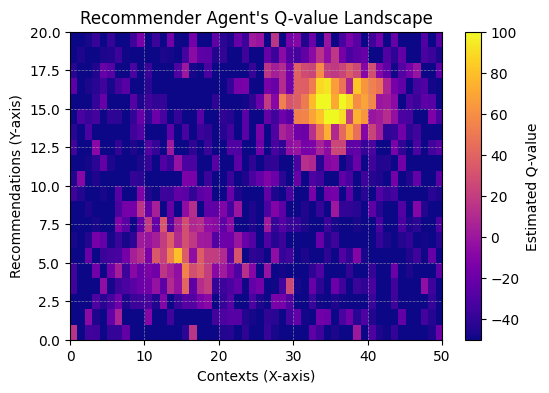

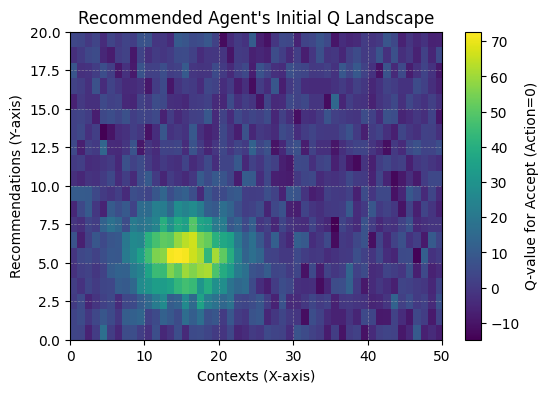

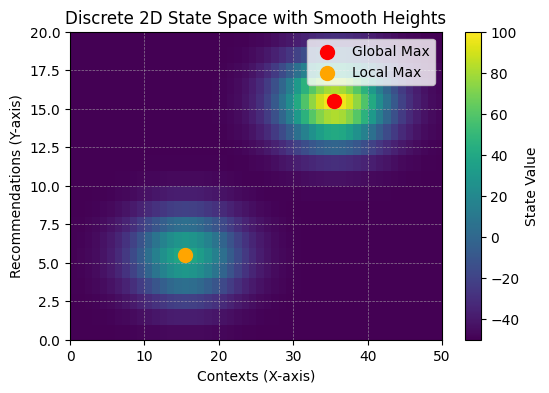

Running Simulation: 100%|██████████| 1000000/1000000 [01:54<00:00, 8701.47it/s]


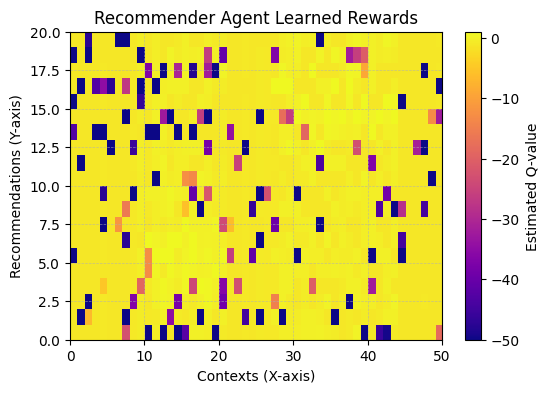

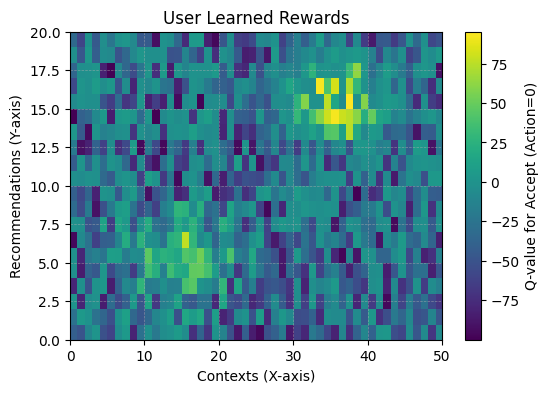

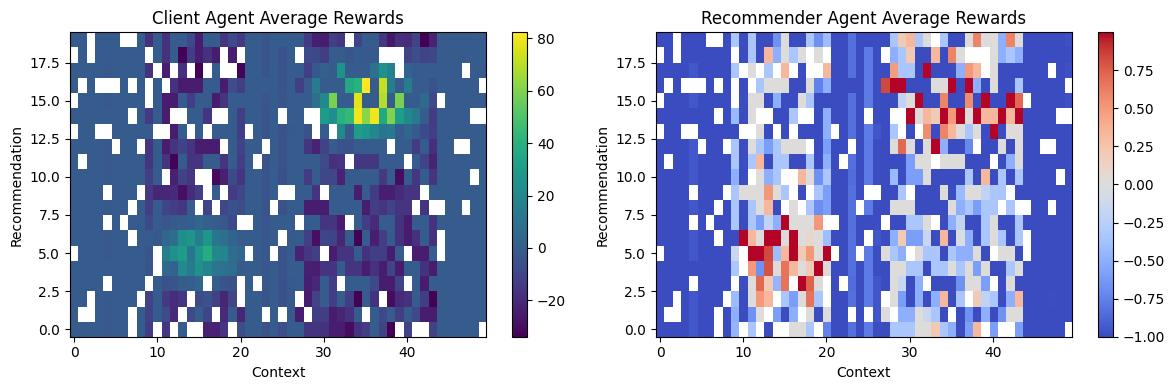

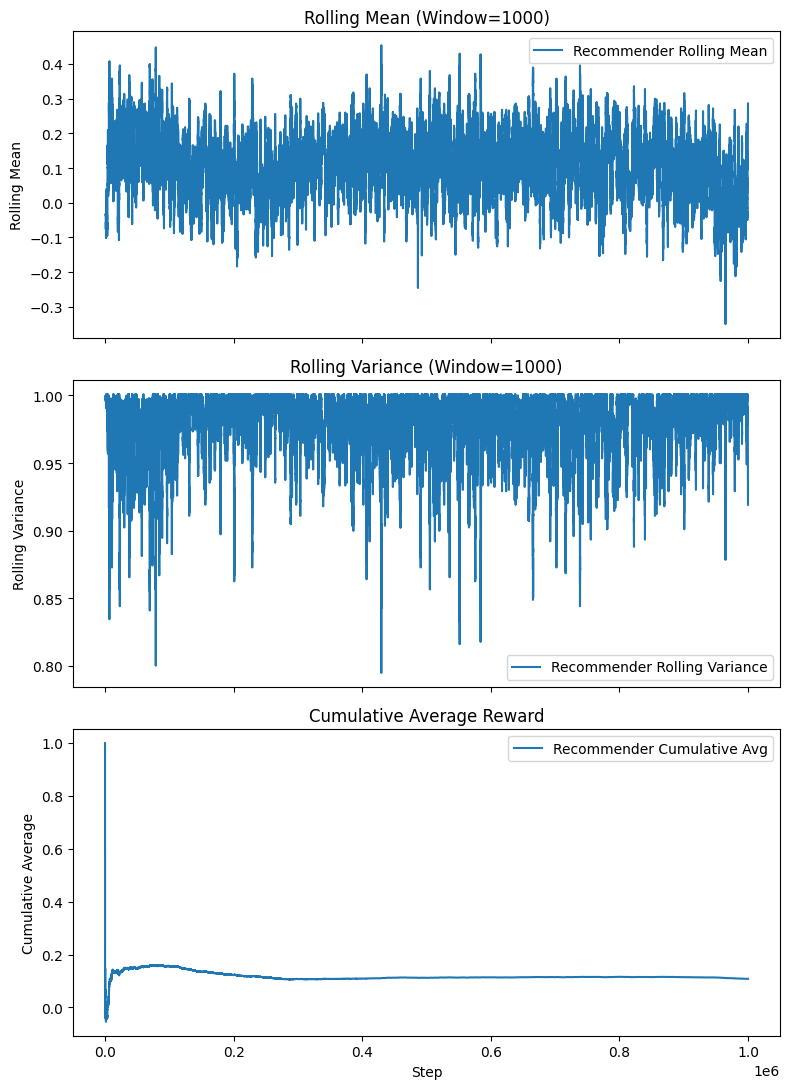

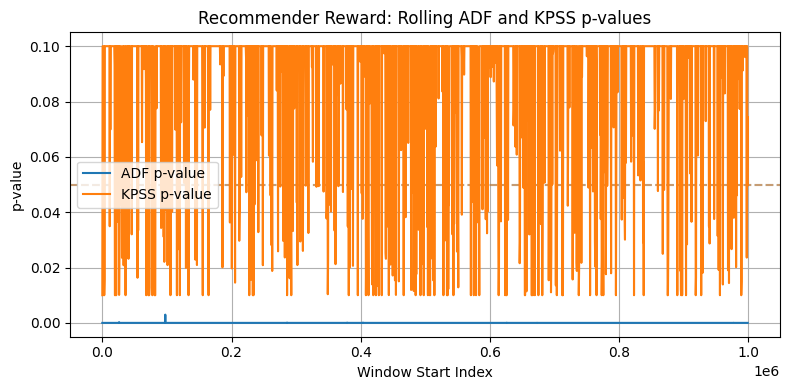

    context    adf_pvalue  kpss_pvalue
0         0  0.000000e+00     0.082834
1         1  0.000000e+00     0.100000
2         2  0.000000e+00     0.100000
3         3  0.000000e+00     0.062290
4         4  8.304306e-07     0.010000
5         5  0.000000e+00     0.038299
6         6  0.000000e+00     0.100000
7         7  0.000000e+00     0.100000
8         8  3.016949e-30     0.010000
9         9  7.073396e-01     0.010000
10       10  7.045889e-01     0.010000
11       11  0.000000e+00     0.055069
12       12  0.000000e+00     0.100000
13       13  0.000000e+00     0.068021
14       14  0.000000e+00     0.060378
15       15  0.000000e+00     0.024216
16       16  0.000000e+00     0.013391
17       17  0.000000e+00     0.071856
18       18  8.157331e-01     0.010000
19       19  0.000000e+00     0.049410
20       20  2.100765e-08     0.010000
21       21  0.000000e+00     0.066075
22       22  0.000000e+00     0.034061
23       23  1.003067e-01     0.010000
24       24  0.000000e+00

In [6]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='egreedy', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# Plot the p-values
plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

stationarity_df = test_stationarity_by_context(
    contexts=results["context_history"],
    rewards=results["recommender_rewards"])
print(stationarity_df)

## Stationary, Initiation, Homeostatic Modulation

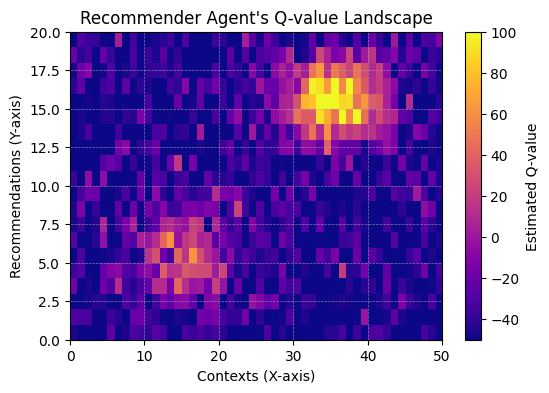

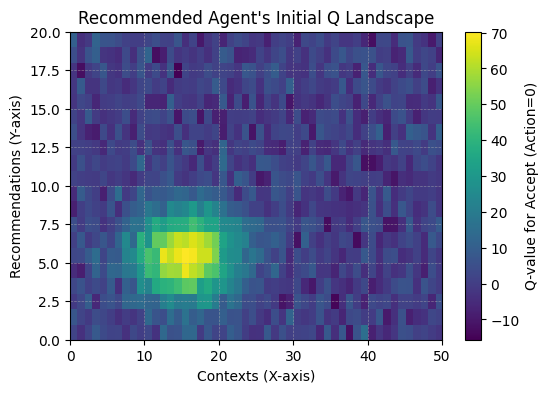

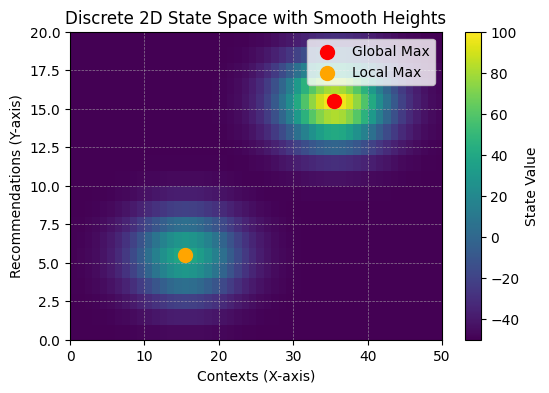

Running Simulation: 100%|██████████| 100000/100000 [00:10<00:00, 9199.48it/s]


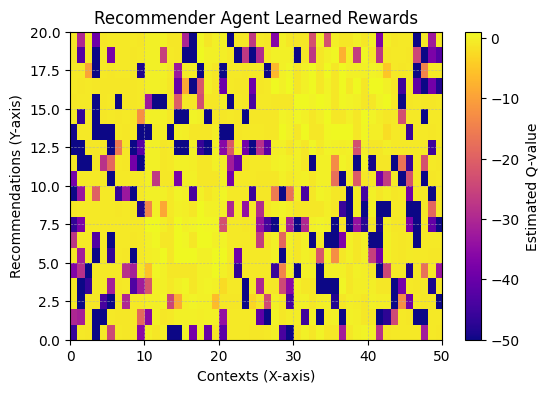

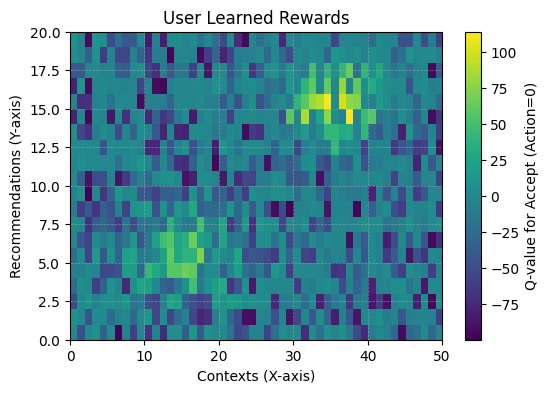

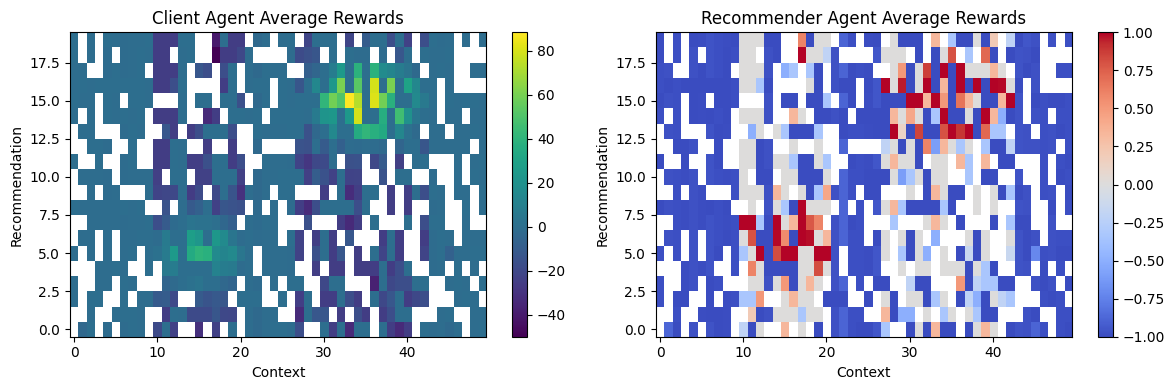

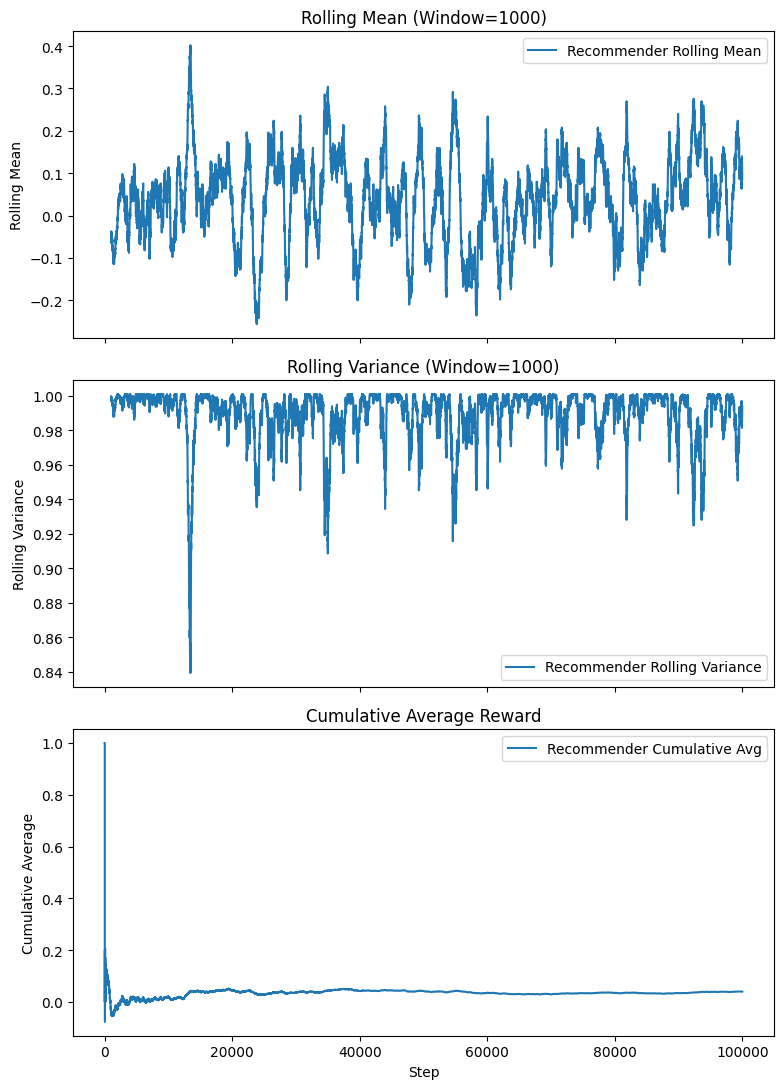

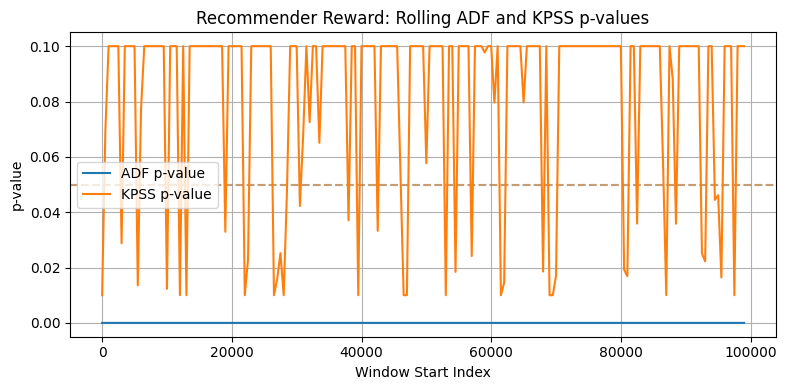

    context    adf_pvalue  kpss_pvalue
0         0  5.421630e-15     0.010000
1         1  1.041201e-08     0.100000
2         2  4.830597e-09     0.010000
3         3  1.074936e-09     0.010000
4         4  4.841587e-21     0.010000
5         5  0.000000e+00     0.100000
6         6  5.758405e-14     0.010000
7         7  2.474893e-29     0.010000
8         8  2.523135e-09     0.010000
9         9  0.000000e+00     0.010000
10       10  1.358693e-27     0.026194
11       11  8.425863e-11     0.010000
12       12  9.434034e-27     0.016088
13       13  6.854171e-14     0.045151
14       14  2.001598e-16     0.010861
15       15  4.820351e-10     0.010000
16       16  2.192482e-30     0.010000
17       17  3.112087e-28     0.017740
18       18  1.227019e-06     0.010000
19       19  1.772429e-09     0.010000
20       20  6.160066e-09     0.010000
21       21  1.159499e-16     0.010000
22       22  7.662327e-03     0.010000
23       23  2.003405e-13     0.010000
24       24  2.025768e-07

In [7]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 100000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='egreedy', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# Plot the p-values
plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

stationarity_df = test_stationarity_by_context(
    contexts=results["context_history"],
    rewards=results["recommender_rewards"])
print(stationarity_df)